In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [6]:
#  Load the  dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\ML project 3\Insurance.csv")

In [8]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# chakin a null value in a dat set but no null value in a data 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

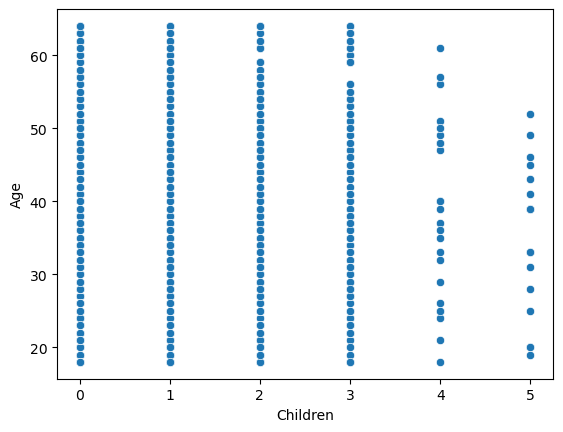

In [12]:
#  scatter plot between age and children
sns.scatterplot(data = df , x ="children", y = "age")
plt.xlabel("Children")
plt.ylabel("Age")
plt.show()

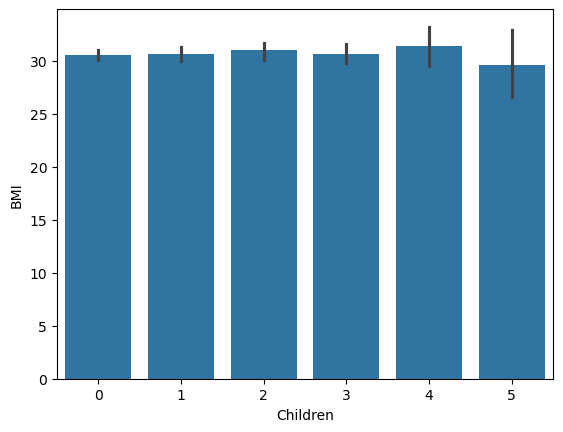

In [14]:
#  bar plot between bmi and children  
sns.barplot(data = df , x = "children", y = "bmi" )
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

In [54]:
# labelencodin in a dataset 
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])

In [56]:
df["smoker"] = lb.fit_transform(df["smoker"])

In [58]:
df["region"] = lb.fit_transform(df["region"])

<Axes: xlabel='charges', ylabel='Count'>

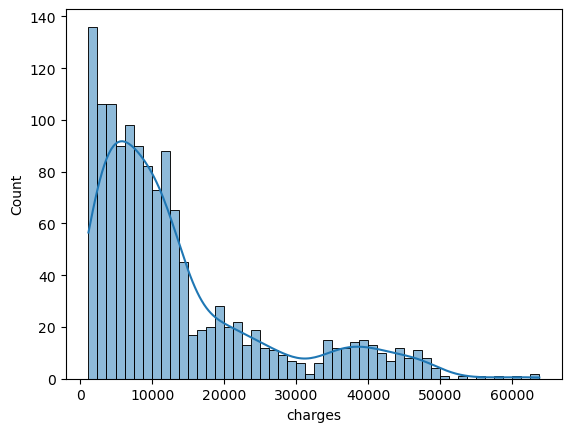

In [18]:

sns.histplot(df['charges'],bins=50,kde=True)

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
# scale the data 
st = StandardScaler()
st.fit(df[["charges"]])

StandardScaler()

In [26]:
st.transform(df[["charges"]])

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [101]:
df["charges"] = pd.DataFrame(st.transform(df[["charges"]]))

<Axes: xlabel='charges', ylabel='Count'>

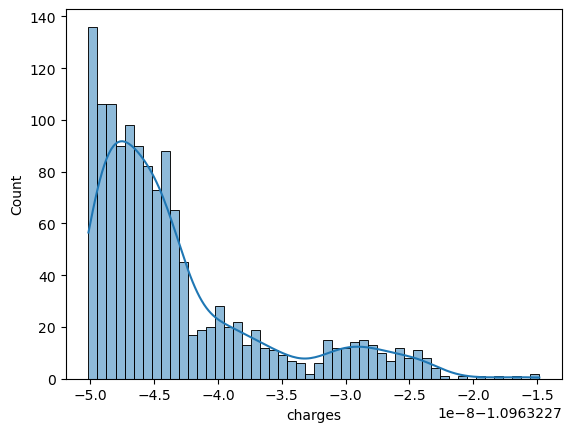

In [105]:
sns.histplot(df['charges'],bins=50,kde=True)

 ***Working with Model***

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
x = df.iloc[:,:-1]
y = df["charges"]

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
lr.score(x_test,y_test)*100

78.33463107362641

In [76]:
lr.score(x_train,y_train)*100

74.17049283233791

In [78]:
lr.coef_

array([ 1.75413819e-06, -1.28231895e-07,  2.29135493e-06,  2.90080136e-06,
        1.61371446e-04, -1.85122932e-06])

In [80]:
lr.intercept_

-1.0964042662995053

In [82]:
# importing a library 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np 

In [84]:
mean_absolute_error(y_test,lr.predict(x_test))

2.8568512786749174e-05

In [86]:
mean_squared_error(y_test,lr.predict(x_test))

1.566265482301767e-09

In [88]:
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

3.957607209289177e-05

In [98]:
r2_score(y_test,lr.predict(x_test))*100

78.33463107362641